In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#file_p6=np.loadtxt("result.txt", delimiter = ";")
result=np.loadtxt("result.dat")

MJD=np.zeros(len(result)-17)
p6=np.zeros(len(result)-17)
err_y=np.zeros(len(result)-17)


for i in range(len(p6)):
  MJD[i]=result[i+17][0]-59417.6193 #Me quedo con los datos post-glitch
  p6[i]=result[i+17][3]
  err_y[i]=result[i+17][4]


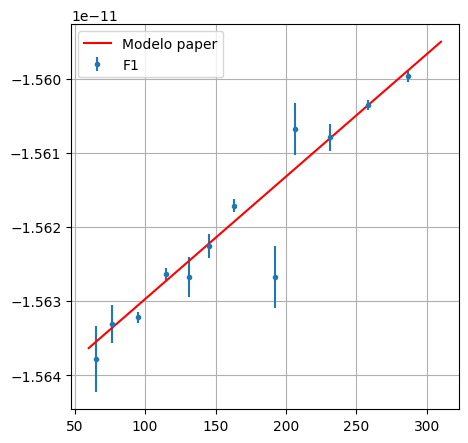

t0=623.9268335986527+/-9.97170816975776e-18
I_a_I_c=0.006634238304341663+/-8.819759530303909e-08
A=-1.5543020383050097e-11+/-1.1039050695982507e-29


In [4]:
#Ajusto por separado:
def eq_11(t,t_0,I_a_I_c,A):
  return I_a_I_c * -1.55645*1e-11* (1-t/t_0) + A

ini_11=[1000, 1e-2,-1.56e-11]
pars_11, cov = curve_fit(f=eq_11, xdata=MJD[6:-1], ydata=p6[6:-1], sigma=err_y[6:-1],p0=ini_11, bounds=([100,1e-3,-1.57e-11],[2000,1e-1,-1.55e-11]))


lins=np.linspace(60,310,1000)
plt.figure(figsize=(5,5))
plt.errorbar(MJD[6:-1],p6[6:-1],yerr=err_y[6:-1], label="F1", fmt=".")
plt.plot(lins, eq_11(lins,*pars_11), label="Modelo paper", color="red")
#plt.plot(lins, modelo_1(lins,17,8.7e-3, 1e-7,0,19,984,1e-15,6.12e-3))
plt.grid()
#plt.ylim([-2*1e-13,2e-14])
plt.legend()
plt.show()

print("t0=" + str(pars_11[0]) + "+/-" + str(np.diag(cov)[0]))
print("I_a_I_c=" + str(pars_11[1])+ "+/-" + str(np.diag(cov)[1]))
print("A=" + str(pars_11[2])+ "+/-" + str(np.diag(cov)[2]))

<ipython-input-6-25510397e0aa>:2: RuntimeWarning: overflow encountered in exp
  return A + I_a_I_c*-1.55645*1e-11*(1-((1-(t_nl/t_0)*np.log(1+(np.exp(t_0/t_nl)-1)*np.exp(-t/t_nl)))/(1-np.exp(-t/t_nl))))


[4.44549e-15 2.54366e-15 7.47638e-16 8.26352e-16 2.70284e-15 1.61691e-15
 8.23973e-16 4.18030e-15 3.51805e-15 1.78765e-15 7.17225e-16 8.16251e-16]


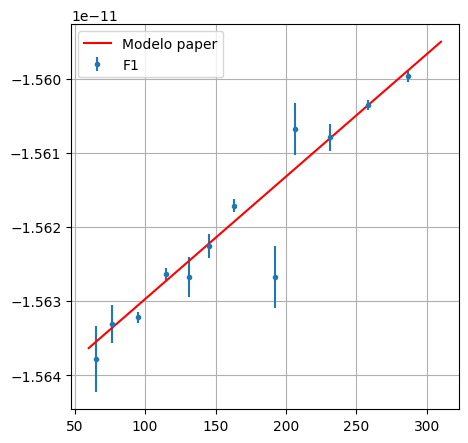

tnl=4.258721661444218+/-0.0
t0=1105.5146303907745+/-7.023709702382273e-09
I_a_I_c=0.011754980097381773+/-9.575880357879129e-08
A=-1.5463318597447085e-11+/-1.6303154197784405e-29


In [6]:
def eq_9(t, t_nl, t_0, I_a_I_c,A):
  return A + I_a_I_c*-1.55645*1e-11*(1-((1-(t_nl/t_0)*np.log(1+(np.exp(t_0/t_nl)-1)*np.exp(-t/t_nl)))/(1-np.exp(-t/t_nl))))

ini_9=[20,1000, 0.006,-1.56e-11]
pars_9, cov = curve_fit(f=eq_9, xdata=MJD[6:-1], ydata=p6[6:-1], sigma=err_y[6:-1],p0=ini_9,absolute_sigma=True ,bounds=([1,100,1e-3,-2e-11],[50,2000,1e-1,-1e-11]))
print(err_y[6:-1])

lins=np.linspace(60,310,1000)
plt.figure(figsize=(5,5))
plt.errorbar(MJD[6:-1],p6[6:-1],yerr=err_y[6:-1], label="F1", fmt=".")
plt.plot(lins, eq_9(lins,*pars_9), label="Modelo paper", color="red")
#plt.plot(lins, modelo_1(lins,17,8.7e-3, 1e-7,0,19,984,1e-15,6.12e-3))
plt.grid()
#plt.ylim([-2*1e-13,2e-14])
plt.legend()
plt.show()

print("tnl=" + str(pars_9[0]) + "+/-" + str(np.sqrt(np.diag(cov))[0]))
print("t0=" + str(pars_9[1]) + "+/-" + str(np.sqrt(np.diag(cov))[1]))
print("I_a_I_c=" + str(pars_9[2]) + "+/-" + str(np.diag(cov)[2]))
print("A=" + str(pars_9[3]) + "+/-" + str(np.diag(cov)[3]))

[ 3.2807 10.0807 18.8807 29.1807 39.2807 52.2807 65.0807 76.4807 94.8807] [-1.57602e-11 -1.56710e-11 -1.56564e-11 -1.56391e-11 -1.56362e-11
 -1.56387e-11 -1.56378e-11 -1.56331e-11 -1.56322e-11]


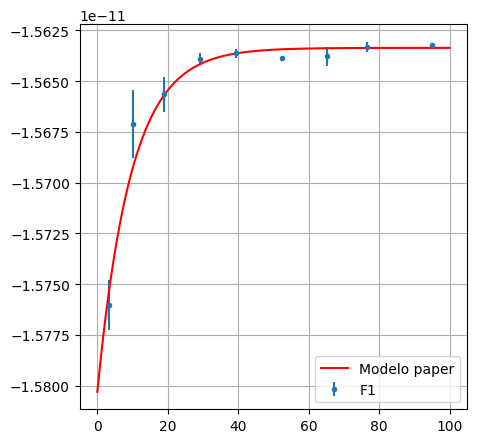

Texp=9.552701441025976+/-5.564576920729735e-07
Iexp/Ic=0.010122591953178616+/-5.564576920729735e-07
A=-1.5633548934108804e-11+/-5.564576920729735e-07


In [9]:
def eq_3(t, t_exp, I_exp_I_c, A):
  return (-I_exp_I_c * 1.381518*1e-5 / (t_exp*24*3600) * np.exp(-t/t_exp)) + A #A es pq resté el promedio de los datos asique en un momento se hacen mayor a 0.

print(MJD[0:9],p6[0:9])
ini_3=[6,1e-3,-1.56e-11]
pars_3, cov = curve_fit(f=eq_3, xdata=MJD[0:9], ydata=p6[0:9], sigma=err_y[0:9],p0=ini_3, bounds=([1,1e-3,-2e-11],[50,1e-1,-1e-11]))


lins=np.linspace(0,100,1000)
plt.figure(figsize=(5,5))
plt.errorbar(MJD[0:9],p6[0:9],yerr=err_y[0:9], label="F1", fmt=".")
plt.plot(lins, eq_3(lins,*pars_3), label="Modelo paper", color="red")
#plt.plot(lins, modelo_1(lins,17,8.7e-3, 1e-7,0,19,984,1e-15,6.12e-3))
plt.grid()
#plt.ylim([-2*1e-13,2e-14])
plt.legend()
plt.show()

print("Texp=" + str(pars_3[0])+ "+/-" + str(np.sqrt(np.diag(cov))[0]))
print("Iexp/Ic=" + str(pars_3[1])+ "+/-" + str(np.sqrt(np.diag(cov))[0]))
print("A=" + str(pars_3[2])+ "+/-" + str(np.sqrt(np.diag(cov))[0]))


In [17]:
#Ahora todo junto:
#Redefino ec 3 sin ordenada:
def eq_3(t, t_exp, I_exp_I_c):
  return (-I_exp_I_c * 1.381518*1e-5 / (t_exp*24*3600) * np.exp(-t/t_exp)) 

def modelo_1(t,t_exp,I_exp_I_c, A, t_nl, t_0, I_a_I_c):
  return eq_3(t, t_exp, I_exp_I_c) + eq_9(t, t_nl, t_0, I_a_I_c,A)

def modelo_2(t,t_exp,I_exp_I_c, A, t_0, I_a_I_c):
  return eq_3(t, t_exp, I_exp_I_c) + eq_11(t, t_0, I_a_I_c,A)


<ipython-input-6-25510397e0aa>:2: RuntimeWarning: invalid value encountered in true_divide
  return A + I_a_I_c*-1.55645*1e-11*(1-((1-(t_nl/t_0)*np.log(1+(np.exp(t_0/t_nl)-1)*np.exp(-t/t_nl)))/(1-np.exp(-t/t_nl))))


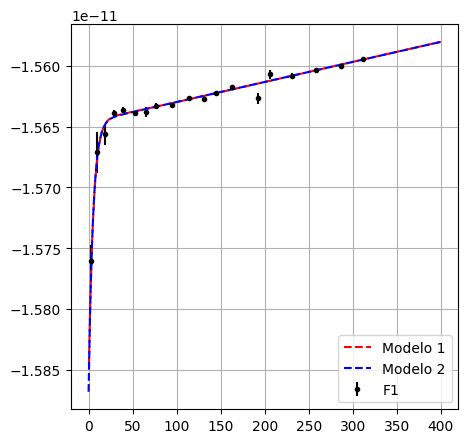

Para el modeelo 1:
Texp=5.221237793234269+/-3.130811508782593e-07
Iexp/Ic=0.007142581676407633+/-0.0007475200275390334
A=-1.5434949641106724e-11+/-3.1895034208859886e-15
Tnl=15.062901075399813+/-8.003100438774475e-09
t0=1275.8556014864705+/-2.580548881499477e-09
Ia/Ic=0.013578641375728007+/-0.00024246918633075967
Para el modeelo 2:
Texp=4.959993851273575+/-2.879207643439529e-07
Iexp/Ic=0.006891541493203772+/-0.0007365152537201998
A=-1.5454751082413848e-11+/-2.836075938884819e-15
t0=1159.3072633103034+/-2.328091116232755e-09
Ia/Ic=0.012297247333718042+/-0.00021947720047376117


In [28]:
#Modelo 1:
ini_1=[6,0.01,-1.56e-11,4,1100,0.01]
pars_1, cov_1 = curve_fit(f=modelo_1, xdata=MJD, ydata=p6, sigma=err_y, p0=ini_1,
                        absolute_sigma=True, 
                        bounds=([1,1e-3,-2e-11,1,200,1e-3],[50,1e-1,-1e-11,50,2000,1e-1]))

ini_2=[6,0.01,-1.56e-11,1100,0.01]
pars_2, cov_2 = curve_fit(f=modelo_2, xdata=MJD, ydata=p6, sigma=err_y, p0=ini_2,
                        absolute_sigma=True, 
                        bounds=([1,1e-3,-2e-11,200,1e-3],[50,1e-1,-1e-11,2000,1e-1]))


lins=np.linspace(0,400,1000)
plt.figure(figsize=(5,5))
plt.errorbar(MJD,p6,yerr=err_y, label="F1", fmt=".", color="black")
plt.plot(lins, modelo_1(lins,*pars_1), label="Modelo 1", color="red", linestyle="--")
plt.plot(lins, modelo_2(lins,*pars_2), label="Modelo 2", color="blue", linestyle="--")
plt.grid()
plt.legend()
plt.savefig("Ajuste")
plt.show()


print("Para el modeelo 1:")
print("Texp=" + str(pars_1[0])+ "+/-" + str(np.sqrt(np.diag(cov_1))[0]))
print("Iexp/Ic=" + str(pars_1[1])+ "+/-" + str(np.sqrt(np.diag(cov_1))[1]))
print("A=" + str(pars_1[2])+ "+/-" + str(np.sqrt(np.diag(cov_1))[2]))
print("Tnl=" + str(pars_1[3])+ "+/-" + str(np.sqrt(np.diag(cov_1))[3]))
print("t0=" + str(pars_1[4])+ "+/-" + str(np.sqrt(np.diag(cov_1))[4]))
print("Ia/Ic=" + str(pars_1[5])+ "+/-" + str(np.sqrt(np.diag(cov_1))[5]))

print("Para el modeelo 2:")
print("Texp=" + str(pars_2[0])+ "+/-" + str(np.sqrt(np.diag(cov_2))[0]))
print("Iexp/Ic=" + str(pars_2[1])+ "+/-" + str(np.sqrt(np.diag(cov_2))[1]))
print("A=" + str(pars_2[2])+ "+/-" + str(np.sqrt(np.diag(cov_2))[2]))
print("t0=" + str(pars_2[3])+ "+/-" + str(np.sqrt(np.diag(cov_2))[3]))
print("Ia/Ic=" + str(pars_2[4])+ "+/-" + str(np.sqrt(np.diag(cov_2))[4]))